(35, 1)
(0, 34)
[400, 104, 80, 78]
[0.05600404739379883, 0.1727585792541504, 0.2538917064666748, 0.4724149703979492]


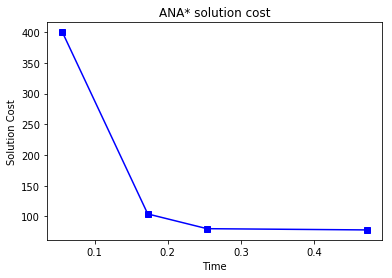

Path found


In [5]:
## ANA* Algorithm

# import libraries
from sys import version_info
if version_info.major == 2:
    # We are using Python 2.x
    from Tkinter import *
    import ttk
elif version_info.major == 3:
    # We are using Python 3.x
    from tkinter import *
    from tkinter import ttk

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the color scheme for visualization. You may change it but I recommend using the same colors

# white (0) is an unvisited node # black(1) is a wall # blue(2) is a visited node # yellow(3) is for start node # green(4) is for exit node # red (5) is a node on the completed path

G_best = 400
cost_of_solution = []
visited_nodes = []
colors = {5: "red", 4: "green", 3: "yellow", 2: "blue", 1: "black", 0: "white"}

'''
Opens the maze file and creates tkinter GUI object
'''
# load maze
with open("hard.txt") as text:
    maze = [list(line.strip()) for line in text]
[col, row] = np.shape(maze)

# create map
root = Tk()
size = 800 / row
canvas = Canvas(root, width=(size*row), height=(size*col))
root.title("A* Algorithm")


class Node:

    def __init__(self, parent=None, pos=None):
        #self.color = val
        #self.x = x
        #self.y = y
        self.e = None
        self.g = 99999999
        self.h = None
        self.f = None
        self.pos = pos
        self.parent = parent

    def __eq__(self, other):
        return self.pos == other.pos


def draw_canvas(canvas, maze):
    '''
    Change this according to the data structure of your maze variable.
    If you are using a node class like the one mentioned below,
    You may have to change fill=colors[int(maze[i][j])] to fill=colors[int(maze[i][j].color)]
    '''
    for i in range(0, col):
        for j in range(0, row):
            canvas.create_rectangle(j*size, i*size, (j+1)*size, (i+1)*size, fill=colors[int(maze[i][j])])
    canvas.pack()

def ana_star(maze, start, exit, conn=4):

    '''
    Visualize the map. Use these functions to visualize your maze.
    You have to update the values in maze.

    For a visited node, set the value to be '2'
    For a node in a path found from start to goal, set the the value to be '5'

    I recommend converting each node in maze to a node class like this-
    
    draw_canvas: plots the grid based on maze values
    root.update(): displays the grid

    You may use or change the functions as you like.

    For each solution, you have to report:
    1) A list of frontier nodes
    2) A list of the path found from start to goal
    3) The time taken and cost for that solution
    '''

    # This visualizes the grid. You may remove this and use the functions as you wish.
    #maze[start[0]][start[1]] = '3'
    #maze[exit[0]][exit[1]] = '4'

    #draw_canvas(canvas, maze)
    #root.update()

    #-------------------------------------------YOUR CODE HERE--------------------------------------------------
    
    # Initalise the beginning and ending nodes
    begin_node = Node(parent=None, pos=start)
    begin_node.g = begin_node.e = begin_node.h = 0
    terminate_node = Node(parent=None, pos=exit)
    terminate_node.g = terminate_node.e = terminate_node.h = 0
    
   
    frontier = []
    expanded = []

    # Add the entrance node
    frontier.append(begin_node)

    
    global G_best
    global cost_of_solution
    global visited_nodes

    cost_of_solution.append(G_best)

    if conn == 8:
        n = [(0, -1), (1, 0), (0, 1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    else: # 4-connected
        n = [(0, -1), (1, 0), (0, 1), (-1, 0)]
    
    while len(frontier) > 0:
        # Get the curr node
        curr_node = frontier[0]
        curr_idx = 0
        
        for idx, item in enumerate(frontier):
            if item.e > curr_node.e:          
                curr_node = item
                curr_idx = idx

        frontier.pop(curr_idx)
        expanded.append(curr_node)
        
        
        
        # Check if goal is found
        if curr_node == terminate_node:
            path = []
            curr = curr_node
            G_best = curr.g

            while curr is not None:
                path.append(curr.pos)
                
                curr = curr.parent
            return path[::-1]

       
        children = []
        for new_cell in n:
            
            
            node_pos = (curr_node.pos[0]+new_cell[0], curr_node.pos[1]+new_cell[1])

            if node_pos[0] > (len(maze)-1) or node_pos[0] < 0 or node_pos[1] > (len(maze[0])-1) or node_pos[1] < 0:
                continue

            if Node(curr_node, node_pos) in expanded:
                continue

            if maze[node_pos[0]][node_pos[1]] != '0':
                continue

            new_node = Node(curr_node, node_pos)

            children.append(new_node)

        for child in children:

            for closed_child in expanded:
                if child == closed_child:
                    continue

            child.g = curr_node.g + 1
            child.h = np.sqrt(((child.pos[0] - terminate_node.pos[0]) ** 2) + ((child.pos[1] - terminate_node.pos[1]) ** 2))
            child.e = (G_best - child.g)/(child.h+0.00001)

            for open_node in frontier:
                if child == open_node and child.g > open_node.g:
                    continue

            frontier.append(child)

    #-----------------------------------------------------------------------------------------------------------


def main():
    
    entrance_node = (row-1, 1)
    print(entrance_node)
    terminate_node = (0, col-2)
    print(terminate_node)
    conn = 4
   
    
    global G_best
    global cost_of_solution
    lastG = G_best

    total_time = []
    add = 0

    while(1):
        begin_time = time.time()
        path = ana_star(maze, entrance_node, terminate_node, conn)
        finish_time = time.time()
        time_for_1_iteration =  finish_time -begin_time  
        add += time_for_1_iteration
        total_time.append(add)

        if(lastG==G_best):
            break
        else:
            lastG = G_best
            continue 

    print(cost_of_solution)
    print(total_time)
    plt.plot(total_time, cost_of_solution,'bs', linestyle='-')
    plt.xlabel('Time')
    plt.ylabel('Solution Cost')
    plt.title('ANA* solution cost')
    plt.show()

    for cell in path:
        maze[cell[0]][cell[1]] = '5'

    maze[entrance_node[0]][entrance_node[1]] = '3'
    maze[terminate_node[0]][terminate_node[1]] = '4'
    draw_canvas(canvas, maze)
    root.update()
    
    if path == None:
        print("Path not found")
    else:
        print("Path found")
        
    root.mainloop()

if __name__ == '__main__':
    main()